### Assignment 1- Computing the area of the Mandelbrot set

In [1]:
import numpy as np
from PIL import Image
import colorsys
import matplotlib.pyplot as plt
import time
from smt.sampling_methods import LHS
import random
from scipy.stats import multivariate_normal


Adding a random seed to ensure reproducibility:

In [2]:
seed_value = 0
np.random.seed(seed_value)
random.seed(seed_value)

#### Exercise 1

First of all, let's give an example of how the mandelbrot set could be computed recursivelly.

In [3]:
def recursive_z(n, c):
    """
    This function recursively computes the value of z in the Mandelbrot sequence.
    z is defined as: z_{n} = z_{n-1}^2 + c, with z_0 = 0.

    Inputs:
    - n: number of iterations
    - c: complex number

    Returns: the result of the n-th iteration in the Mandelbrot sequence for a given "c"

    """
    if n == 0:
        return 0
    else:
        return recursive_z(n - 1, c)**2 + c

Then, we will implement a function that checks if a value of c is stable, that is, if it belongs to the Mandelbrot set. Finally, we draw a picture of the fractal.

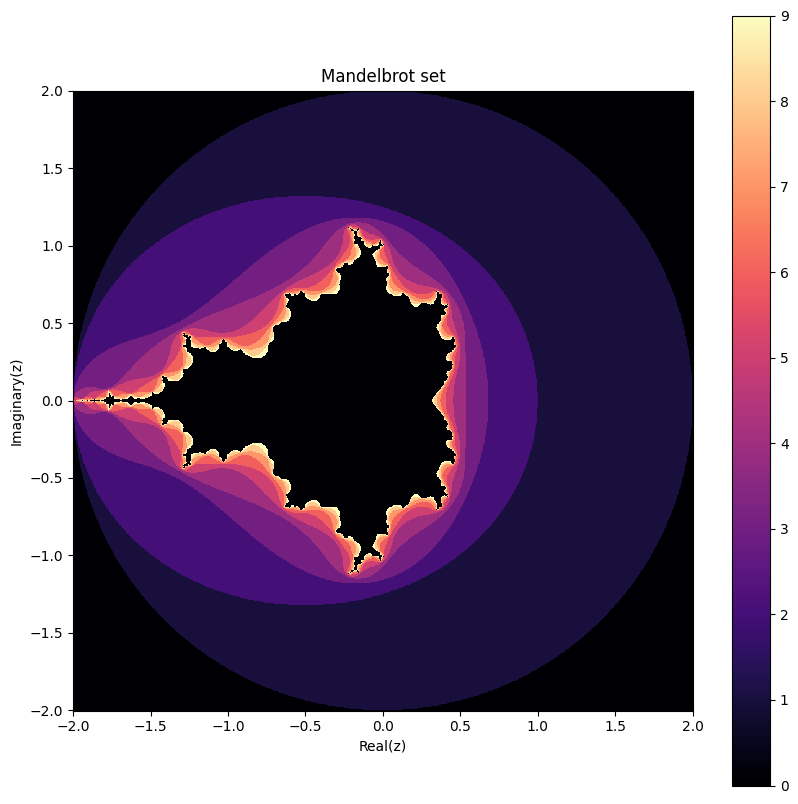

In [4]:
# Checking if a point is in the Mandelbrot set
def in_mandelbrot(c, max_iter):
    """ 
    This function determines if a given "c" is in the Mandelbrot set, by iterating the Mandelbrot
    sequence for a given number of iterations.
    If the magnitude of z is higher than 2, the sequence diverges, and "c" is not in the Mandelbrot set.

    Inputs:
    - c: the complex number to tes
    - max_iter: maximum number of iterations

    Returns:
    If the sequence diverges, it returns the iteration at which divergence occured.
    If the sequence does not diverge, it returns max_iter.
    
    """
    z = 0
    for i in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return i
    return max_iter

# grid for the complex plane
xvalues = np.linspace(-2, 2, 1000)
yvalues = np.linspace(-2, 2, 1000)

colormap = 'magma'
max_iter = 10

iteration_array = []
for y in yvalues:
    row = []
    for x in xvalues:
        c = complex(x, y)
        if in_mandelbrot(c, max_iter) == max_iter:
            row.append(0)
        else:
            row.append(in_mandelbrot(c, max_iter))
    iteration_array.append(row)

# plotting the Mandelbrot set
ax = plt.axes()
ax.set_aspect('equal')
graph = ax.pcolormesh(xvalues, yvalues, iteration_array, cmap=colormap)
plt.colorbar(graph)
plt.xlabel('Real(z)')
plt.ylabel('Imaginary(z)')
plt.title('Mandelbrot set')
plt.gcf().set_size_inches(10, 10)
plt.show()


#### Exercise 2

In [5]:

def est_area(num_points, max_iter, seed = 0):
    """ 
    This function estimates the area of the Mendelbrot set using a Monte Carlo method.
    The function randomly samples point in the complex plane (from -2 to 2 both on the real and imaginary axes),
    and uses the function "in_mandelbrot" to check whether each point is within the set.
    The area is estimated based on the ratio of points inside the set to the toal number of points.

    Inputs:
    - num_points: number of random sample points
    - max_iter: maximum number of iterations for the "in_mandelbrot" function

    Returns: estimated area of the Mendelbrot set
    
    """
    np.random.seed(seed)

    p_inside = 0
    p_outside = 0
    for i in range(num_points):
        # sampling random points in the complex plane
        s_real = np.random.uniform(-2,2)
        s_im = np.random.uniform(-2,2)
        c = complex(s_real, s_im)

        if in_mandelbrot(c, max_iter) == max_iter: # c is within the Mendelbrot set
            p_inside += 1
        else: # c is not in the Mendelbrot set
            p_outside += 1
    
    est_area = (p_inside/num_points) * 16 # 16 is the total area of the region considered (4*4)
    return est_area

area = est_area(50000, 300) 
print("Estimated Area: ", area)

Estimated Area:  1.49632


A_is for i = 10, s = 10: 1.6


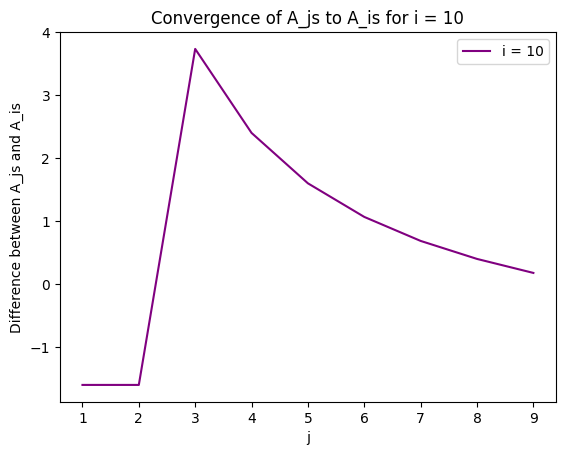

A_is for i = 100, s = 100: 1.44


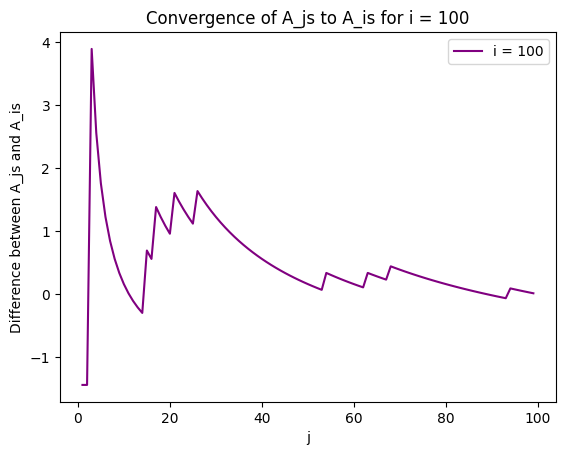

A_is for i = 1000, s = 1000: 1.344


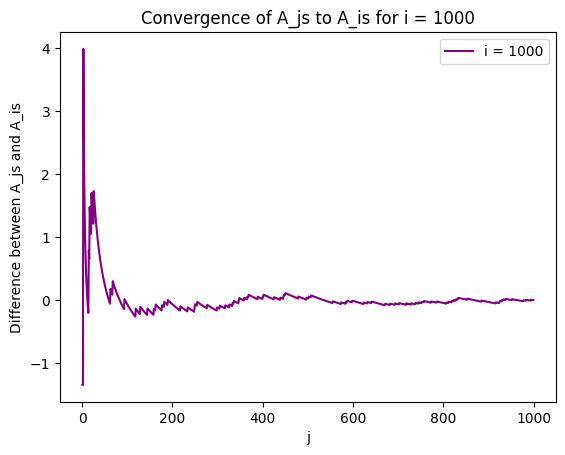

A_is for i = 10000, s = 10000: 1.4416
Iteration exceeded time limit. Stopping the program.


SystemExit: Stopped due to time limit exceeded.

In [ ]:
max_time_per_iteration = 300 # Time limit of 5 minutes

power = 1 # Starting power for i and s

while True:
    iteration_start_time = time.time()

    i, s = 10**power, 10**power

    # Compute area estimate A_is for the current values of i and s
    A_is = est_area(i, s)
    print(f"A_is for i = {i}, s = {s}: {A_is}")

    # Store differences for plotting
    j_list = []
    diff_list = []

    # Loop over values of j < 1 and calculate A_js
    for j in range(1, 10**power):
        if time.time() - iteration_start_time > max_time_per_iteration:
            print("Iteration exceeded time limit. Stopping the program.")
            raise SystemExit("Stopped due to time limit exceeded.")       
        A_js = est_area(j, s) 
        j_list.append(j)
        diff_list.append(A_js - A_is)

    # Plot the difference between A_js and A_is for the current power
    plt.plot(j_list, diff_list, color = "purple", label = f"i = {i}")
    plt.xlabel("j")
    plt.ylabel("Difference between A_js and A_is")
    plt.title(f"Convergence of A_js to A_is for i = {i}")
    plt.legend()
    plt.show()
    
    power += 1

#### Exercise 3

In [8]:
def est_area_modified(num_points, max_iter):
    """ 
    """
    p_inside = 0
    p_outside = 0
    for i in range(num_points):
        # sampling random points in the complex plane
        s_real = np.random.uniform(-2,2)
        s_im = np.random.uniform(-2,2)
        c = complex(s_real, s_im)

        if in_mandelbrot(c, max_iter) == max_iter: # c is within the Mendelbrot set
            p_inside += 1
        else: # c is not in the Mendelbrot set
            p_outside += 1
    p = p_inside/num_points
    est_area = p * 16 # 16 is the total area of the region considered (4*4)

    # Calculate standard error and 95% confidence interval
    standard_error = np.sqrt(p * (1 - p) / num_points) * 16
    confidence_interval = (est_area - 1.96 * standard_error, est_area + 1.96 * standard_error)
    # Put only 3 decimal digits
    confidence_interval = tuple(map(lambda x: round(x, 3), confidence_interval))
    return est_area, confidence_interval

max_time_per_iteration = 100
power = 1

while True:
    timeout_start = time.time()
    i, s = 10**power, 10**power
    area = est_area_modified(i, s)[0] 
    conf_int = est_area_modified(i, s)[1]
    if time.time() - timeout_start > max_time_per_iteration:
        break
    power += 1
    print(f'Estimated area with s={s} and i={i}:', area)
    conf_int = tuple(float(x) for x in conf_int)
    print(f'95% confidence interval:', conf_int)

Estimated area with s=10 and i=10: 3.2
95% confidence interval: (-0.767, 7.167)
Estimated area with s=100 and i=100: 1.76
95% confidence interval: (0.429, 2.131)
Estimated area with s=1000 and i=1000: 1.232
95% confidence interval: (1.142, 1.706)
Estimated area with s=10000 and i=10000: 1.52
95% confidence interval: (1.38, 1.561)


In [9]:
def est_area_LHS(num_points, max_iter):
    p_inside = 0
    p_outside = 0
    xlimits = np.array([[-2, 2]])   
    
    sampling_real = LHS(xlimits=xlimits)
    sampling_im = LHS(xlimits=xlimits)
    s_real = sampling_real(num_points)
    s_im = sampling_im(num_points)
    # put the points in a list
    s_real_list = [i for [i] in s_real]
    s_im_list = [i for [i] in s_im]
    c_list = [complex(s_real, s_im) for s_real, s_im in zip(s_real_list, s_im_list)]
    for c in c_list:
        if in_mandelbrot(c, max_iter) == max_iter:
            p_inside += 1
        else:
            p_outside += 1
    p = p_inside/num_points
    est_area = p*16

    # Calculate standard error and 95% confidence interval
    standard_error = np.sqrt(p * (1 - p) / num_points) * 16
    confidence_interval = (est_area - 1.96 * standard_error, est_area + 1.96 * standard_error)
    confidence_interval = tuple(map(lambda x: round(x, 3), confidence_interval))
    return est_area, confidence_interval

max_time_per_iteration = 100
power = 1
while True:
    timeout_start = time.time()
    i, s = 10**power, 10**power
    area = est_area_LHS(i, s)[0]
    conf_int = est_area_LHS(i, s)[1] 
    if time.time() - timeout_start > max_time_per_iteration:
        break
    power += 1
    print(f'Estimated area with s={s} and i={i}:', area)
    conf_int = tuple(float(x) for x in conf_int)
    print(f'95% confidence interval:', conf_int)


Estimated area with s=10 and i=10: 1.6
95% confidence interval: (-1.375, 4.575)
Estimated area with s=100 and i=100: 1.44
95% confidence interval: (1.152, 3.328)
Estimated area with s=1000 and i=1000: 1.456
95% confidence interval: (1.171, 1.741)
Estimated area with s=10000 and i=10000: 1.5616
95% confidence interval: (1.416, 1.599)


In [15]:
def est_area_orthogonal(num_points, max_iter):
    p_inside = 0
    p_outside = 0
    xlimits_list =[]
    x1, x2 = -2, -1.5
   
    while x2 <= 2:
        y1, y2 = -2, -1.5
        while y2 <= 2:
            xlimits = np.array([[x1, x2], [y1, y2]])
            xlimits_list.append(xlimits)
            y1 += 0.5
            y2 += 0.5
            
        x1 += 0.5
        x2 += 0.5
    
    for xlimits in xlimits_list:
        
        sampling = LHS(xlimits=xlimits)
        
        num = int(num_points/len(xlimits_list))
        s = sampling(num)
        
        s_real_list = [i[0] for i in s]
        s_im_list = [i[1] for i in s]
        c_list = [complex(s_real, s_im) for s_real, s_im in zip(s_real_list, s_im_list)]
        
        for c in c_list:
            if in_mandelbrot(c, max_iter) == max_iter:
                p_inside += 1
            else:
                p_outside += 1
    p = p_inside/num_points
    est_area = p*16

    # Calculate standard error and 95% confidence interval
    standard_error = np.sqrt(p * (1 - p) / num_points) * 16
    confidence_interval = (est_area - 1.96 * standard_error, est_area + 1.96 * standard_error)
    confidence_interval = tuple(map(lambda x: round(x, 3), confidence_interval))
    return est_area, confidence_interval

max_time_per_iteration = 10
power = 2
while True:
    timeout_start = time.time()
    # the power of 8 is used since the total number of points needs to be divisible by 64 (the number of subspaces)
    i, s = 8**power, 8**power
    area = est_area_orthogonal(i, s)[0] 
    conf_int = est_area_orthogonal(i, s)[1]
    power += 1
    print(f'Estimated area with s={s} and i={i}:', area)
    conf_int = tuple(float(x) for x in conf_int)
    print(f'95% confidence interval:', conf_int)
    if time.time() - timeout_start > max_time_per_iteration:
        break


Estimated area with s=64 and i=64: 1.0
95% confidence interval: (0.051, 1.949)
Estimated area with s=512 and i=512: 1.65625
95% confidence interval: (0.987, 1.763)
Estimated area with s=4096 and i=4096: 1.53125
95% confidence interval: (1.32, 1.602)
Estimated area with s=32768 and i=32768: 1.50146484375
95% confidence interval: (1.456, 1.557)


#### Exercise 4

In [16]:
def importance_sampling(num_points):
    samples = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], num_points)
    samples = np.clip(samples, -2, 2)  # Limit samples to the region of interest
    return samples

def est_area_with_antithetic(num_points, max_iter, seed=0):
    np.random.seed(seed)
    samples = importance_sampling(num_points // 2)  # Use half the number of points for pairs

    # Define the probability density function for the sampling distribution
    pdf = multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]])
    
    weighted_estimates = []
    for sample in samples:
        s_real, s_im = sample
        c = complex(s_real, s_im)
        c_antithetic = complex(-s_real, -s_im)  # Generate the antithetic pair

        # Check if the points are in the Mandelbrot set
        in_set = in_mandelbrot(c, max_iter) == max_iter
        in_set_antithetic = in_mandelbrot(c_antithetic, max_iter) == max_iter

        # Compute weights for both the sample and its antithetic pair
        weight = 1 / pdf.pdf([s_real, s_im])
        weight_antithetic = 1 / pdf.pdf([-s_real, -s_im])

        # Add weighted estimates for the sample and its antithetic pair
        weighted_estimates.append(in_set * weight)
        weighted_estimates.append(in_set_antithetic * weight_antithetic)
    
    # Calculate estimated area
    est_area = sum(weighted_estimates) / num_points
    
    # Calculate variance and standard error of the weighted estimates
    variance = np.var(weighted_estimates, ddof=1)
    standard_error = np.sqrt(variance / num_points)

    # 95% confidence interval
    confidence_interval = (est_area - 1.96 * standard_error, est_area + 1.96 * standard_error)
    confidence_interval = tuple(float(round(x, 3)) for x in confidence_interval)  # Convert to regular floats for printing
    
    return est_area, confidence_interval

max_time_per_iteration = 100
power = 1
while True:
    timeout_start = time.time()
    i, s = 10**power, 10**power
    area, confidence_interval = est_area_with_antithetic(s, i)
    if time.time() - timeout_start > max_time_per_iteration:
        break
    power += 1
    print(f'Estimated area with s={s} and i={i}:', area)
    confidence_interval = tuple(float(x) for x in confidence_interval)  # Convert to regular floats
    print(f'95% confidence interval:', confidence_interval)


Estimated area with s=10 and i=10: 2.3725434964094467
95% confidence interval: (-0.053, 4.798)
Estimated area with s=100 and i=100: 2.009066940275822
95% confidence interval: (1.343, 2.675)
Estimated area with s=1000 and i=1000: 1.540274805137629
95% confidence interval: (1.351, 1.729)
Estimated area with s=10000 and i=10000: 1.541259593207063
95% confidence interval: (1.481, 1.601)


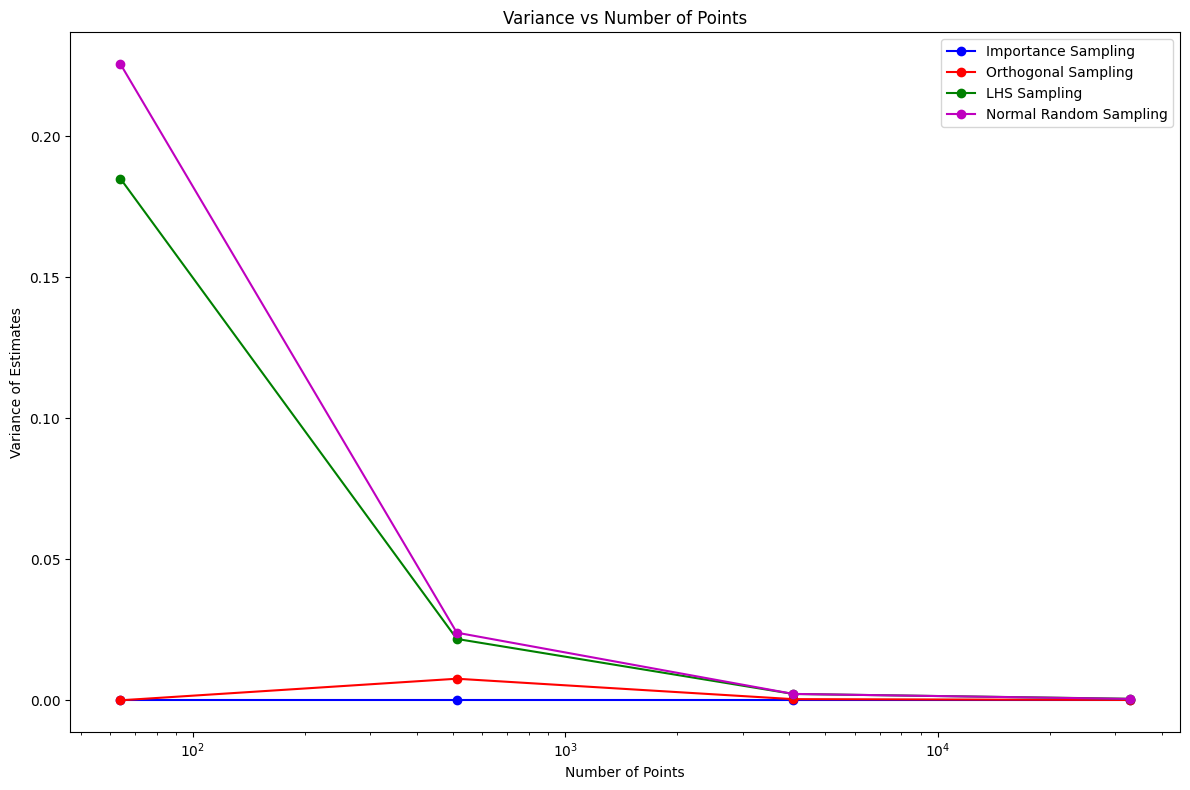

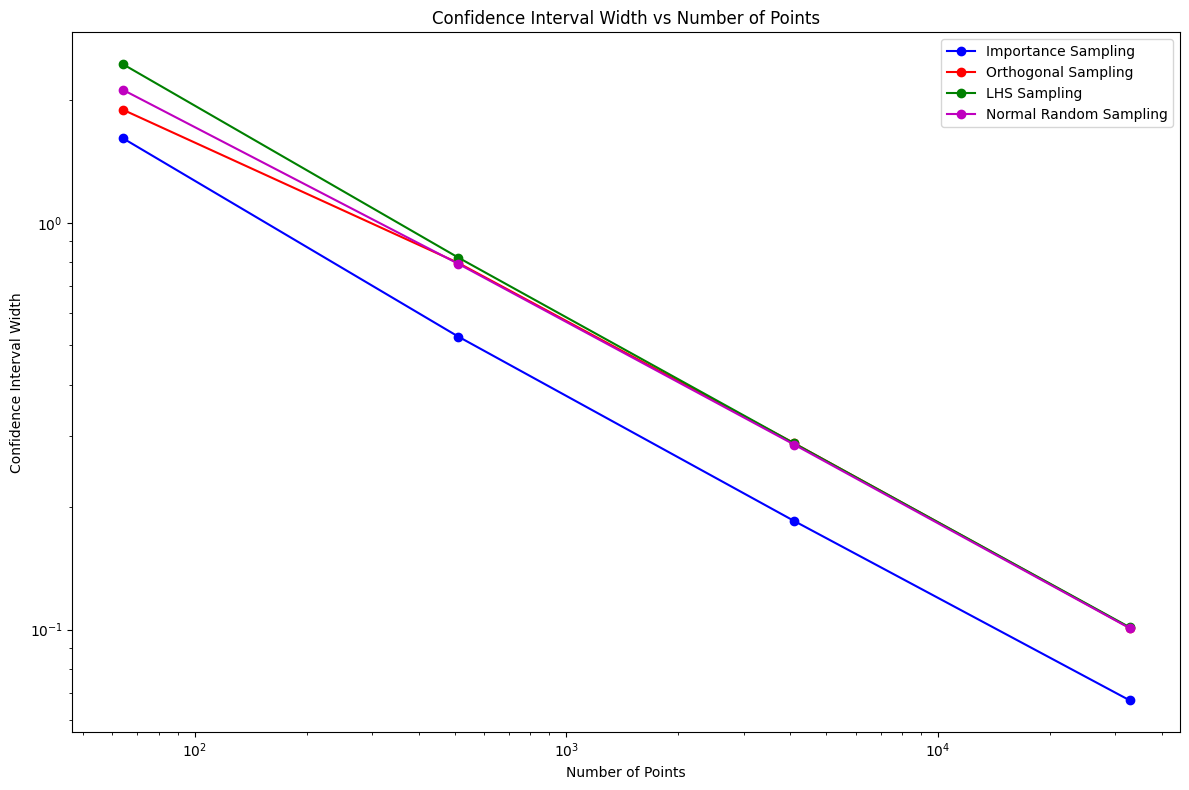

In [17]:
# Function to compare estimations and plot the results
def compare_and_plot():
    num_points_list = [64, 512, 4096, 32768]
    num_repeats = 10  # Number of repeats for variance calculation
    
    times_is = []
    times_orthogonal = []
    times_LHS = []
    times_random = []
    
    variances_is = []
    variances_orthogonal = []
    variances_LHS = []
    variances_random = []
    
    ci_width_is = []
    ci_width_orthogonal = []
    ci_width_LHS = []
    ci_width_random = []
    
    for num_points in num_points_list:
        # Variables to store estimates from multiple runs
        area_is_list = []
        area_orthogonal_list = []
        area_LHS_list = []
        area_random_list = []
        
        # Timing and estimating for importance sampling with antithetic variates
        start_time_is = time.time()
        ci_width = []
        for _ in range(num_repeats):
            area_is, conf_interval_is = est_area_with_antithetic(num_points, num_points)
            area_is_list.append(area_is)
            ci_width.append(conf_interval_is[1] - conf_interval_is[0])
        ci_val = np.mean(ci_width)
        ci_width_is.append(ci_val)
        end_time_is = time.time()
        
        # Calculate variance for importance sampling
        variance_is = np.var(area_is_list)
        variances_is.append(variance_is)
        times_is.append(end_time_is - start_time_is)
        
        # Timing and estimating for orthogonal sampling
        start_time_orthogonal = time.time()
        ci_width = []
        for _ in range(num_repeats):
            area_orthogonal, conf_interval_orthogonal = est_area_orthogonal(num_points, num_points)
            area_orthogonal_list.append(area_orthogonal)
            ci_width.append(conf_interval_orthogonal[1] - conf_interval_orthogonal[0])
        ci_val = np.mean(ci_width)
        ci_width_orthogonal.append(ci_val)
        end_time_orthogonal = time.time()
        
        # Calculate variance for orthogonal sampling
        variance_orthogonal = np.var(area_orthogonal_list)
        variances_orthogonal.append(variance_orthogonal)
        times_orthogonal.append(end_time_orthogonal - start_time_orthogonal)
        
        # Timing and estimating for LHS sampling
        start_time_LHS = time.time()
        ci_width = []
        for _ in range(num_repeats):
            area_LHS, conf_interval_LHS = est_area_LHS(num_points, num_points)
            area_LHS_list.append(area_LHS)
            ci_width.append(conf_interval_LHS[1] - conf_interval_LHS[0])
        ci_val = np.mean(ci_width)
        ci_width_LHS.append(ci_val)
        end_time_LHS = time.time()
        
        # Calculate variance for LHS sampling
        variance_LHS = np.var(area_LHS_list)
        variances_LHS.append(variance_LHS)
        times_LHS.append(end_time_LHS - start_time_LHS)
        
        # Timing and estimating for normal random sampling
        start_time_random = time.time()
        ci_width = []
        for _ in range(num_repeats):
            area_random, conf_interval_random = est_area_modified(num_points, num_points)
            area_random_list.append(area_random)
            ci_width.append(conf_interval_random[1] - conf_interval_random[0])
        end_time_random = time.time()
        ci_val = np.mean(ci_width)
        ci_width_random.append(ci_val)

        # Calculate variance for normal random sampling
        variance_random = np.var(area_random_list)
        variances_random.append(variance_random)
        times_random.append(end_time_random - start_time_random)
    
    # Plot: Variance vs Number of Points
    plt.figure(figsize=(12, 8))
    plt.semilogx(num_points_list, variances_is, label="Importance Sampling", marker='o', color='b')
    plt.semilogx(num_points_list, variances_orthogonal, label="Orthogonal Sampling", marker='o', color='r')
    plt.semilogx(num_points_list, variances_LHS, label="LHS Sampling", marker='o', color='g')
    plt.semilogx(num_points_list, variances_random, label="Normal Random Sampling", marker='o', color='m')
    plt.title('Variance vs Number of Points')
    plt.xlabel('Number of Points')
    plt.ylabel('Variance of Estimates')
    plt.legend()
    plt.tight_layout()  
    plt.show()  
    
    # Plot: Confidence Interval Width vs Number of Points
    plt.figure(figsize=(12, 8))  # Set the figure size
    plt.loglog(num_points_list, ci_width_is, label="Importance Sampling", marker='o', color='b')
    plt.loglog(num_points_list, ci_width_orthogonal, label="Orthogonal Sampling", marker='o', color='r')
    plt.loglog(num_points_list, ci_width_LHS, label="LHS Sampling", marker='o', color='g')
    plt.loglog(num_points_list, ci_width_random, label="Normal Random Sampling", marker='o', color='m')
    plt.title('Confidence Interval Width vs Number of Points')
    plt.xlabel('Number of Points')
    plt.ylabel('Confidence Interval Width')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the comparison and plot the results
compare_and_plot()